In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading data

In [2]:
rootPath = os.getcwd()
os.makedirs('data', exist_ok=True)

folder = 'data'
filePath = os.path.join(rootPath, folder)

fileFeatures = os.path.join(filePath, 'dengue_features_train.csv')
fileLabels = os.path.join(filePath, 'dengue_labels_train.csv')

X = pd.read_csv(os.path.join(filePath, fileFeatures))
y = pd.read_csv(os.path.join(filePath, fileLabels))


## 

## Exploratory data analysis

In [3]:
X.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [4]:
y.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [6]:
X['week_start_date'] = pd.to_datetime(X['week_start_date'])
X

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                               32.00                             73.365714   
1                               17.94                             77.368571   
2                               26.10                             82.052857   
3                               13.90                             80.337143   
4                               12.20                             80.460000   
...                               ...                                   ...   
1451                            45.00                             88.765714   
1452                           207.10                             91.600000   
1453                            50.60                             94.280000   
1454                            62.33                             94.660000   
1455                            36.90                             89.082857   

      reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                            12.42                              14.012857   
1                            22.82                              15.372857   
2                            34.54                              16.848571   
3                            15.36                              16.672857   
4                             7.52                              17.210000   
...                            ...                                    ...   
1451                         55.30                              18.485714   
1452                         86.47                              18.070000   
1453                         58.94                              17.008571   
1454                         59.67                              16.815714   
1455                         63.22                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286      

In [7]:
type(X['week_start_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Checking Missing values

In [8]:
print(f"Number of variables with missing instances: {sum(X.isna().any())}")

Number of variables with missing instances: 20


In [9]:
z = X.isna().any()
z = z.loc[lambda x: x == True]
withMissing = list(z.index)

# count missing instances for each feature 
missingCounts = {}
for c in withMissing:
    missingCounts[c] = sum(X[c].isna())

# print(f"{c} : {sum(X[c].isna())}")
missingCounts

{'ndvi_ne': 194,
 'ndvi_nw': 52,
 'ndvi_se': 22,
 'ndvi_sw': 22,
 'precipitation_amt_mm': 13,
 'reanalysis_air_temp_k': 10,
 'reanalysis_avg_temp_k': 10,
 'reanalysis_dew_point_temp_k': 10,
 'reanalysis_max_air_temp_k': 10,
 'reanalysis_min_air_temp_k': 10,
 'reanalysis_precip_amt_kg_per_m2': 10,
 'reanalysis_relative_humidity_percent': 10,
 'reanalysis_sat_precip_amt_mm': 13,
 'reanalysis_specific_humidity_g_per_kg': 10,
 'reanalysis_tdtr_k': 10,
 'station_avg_temp_c': 43,
 'station_diur_temp_rng_c': 43,
 'station_max_temp_c': 20,
 'station_min_temp_c': 14,
 'station_precip_mm': 22}

In [10]:
X.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [11]:
X.columns
datetimecols = ['city',	'year',	'weekofyear', 'week_start_date']
features = [c for c in X.columns if c not in datetimecols]

# TIME SERIES PLOTS

## All cities

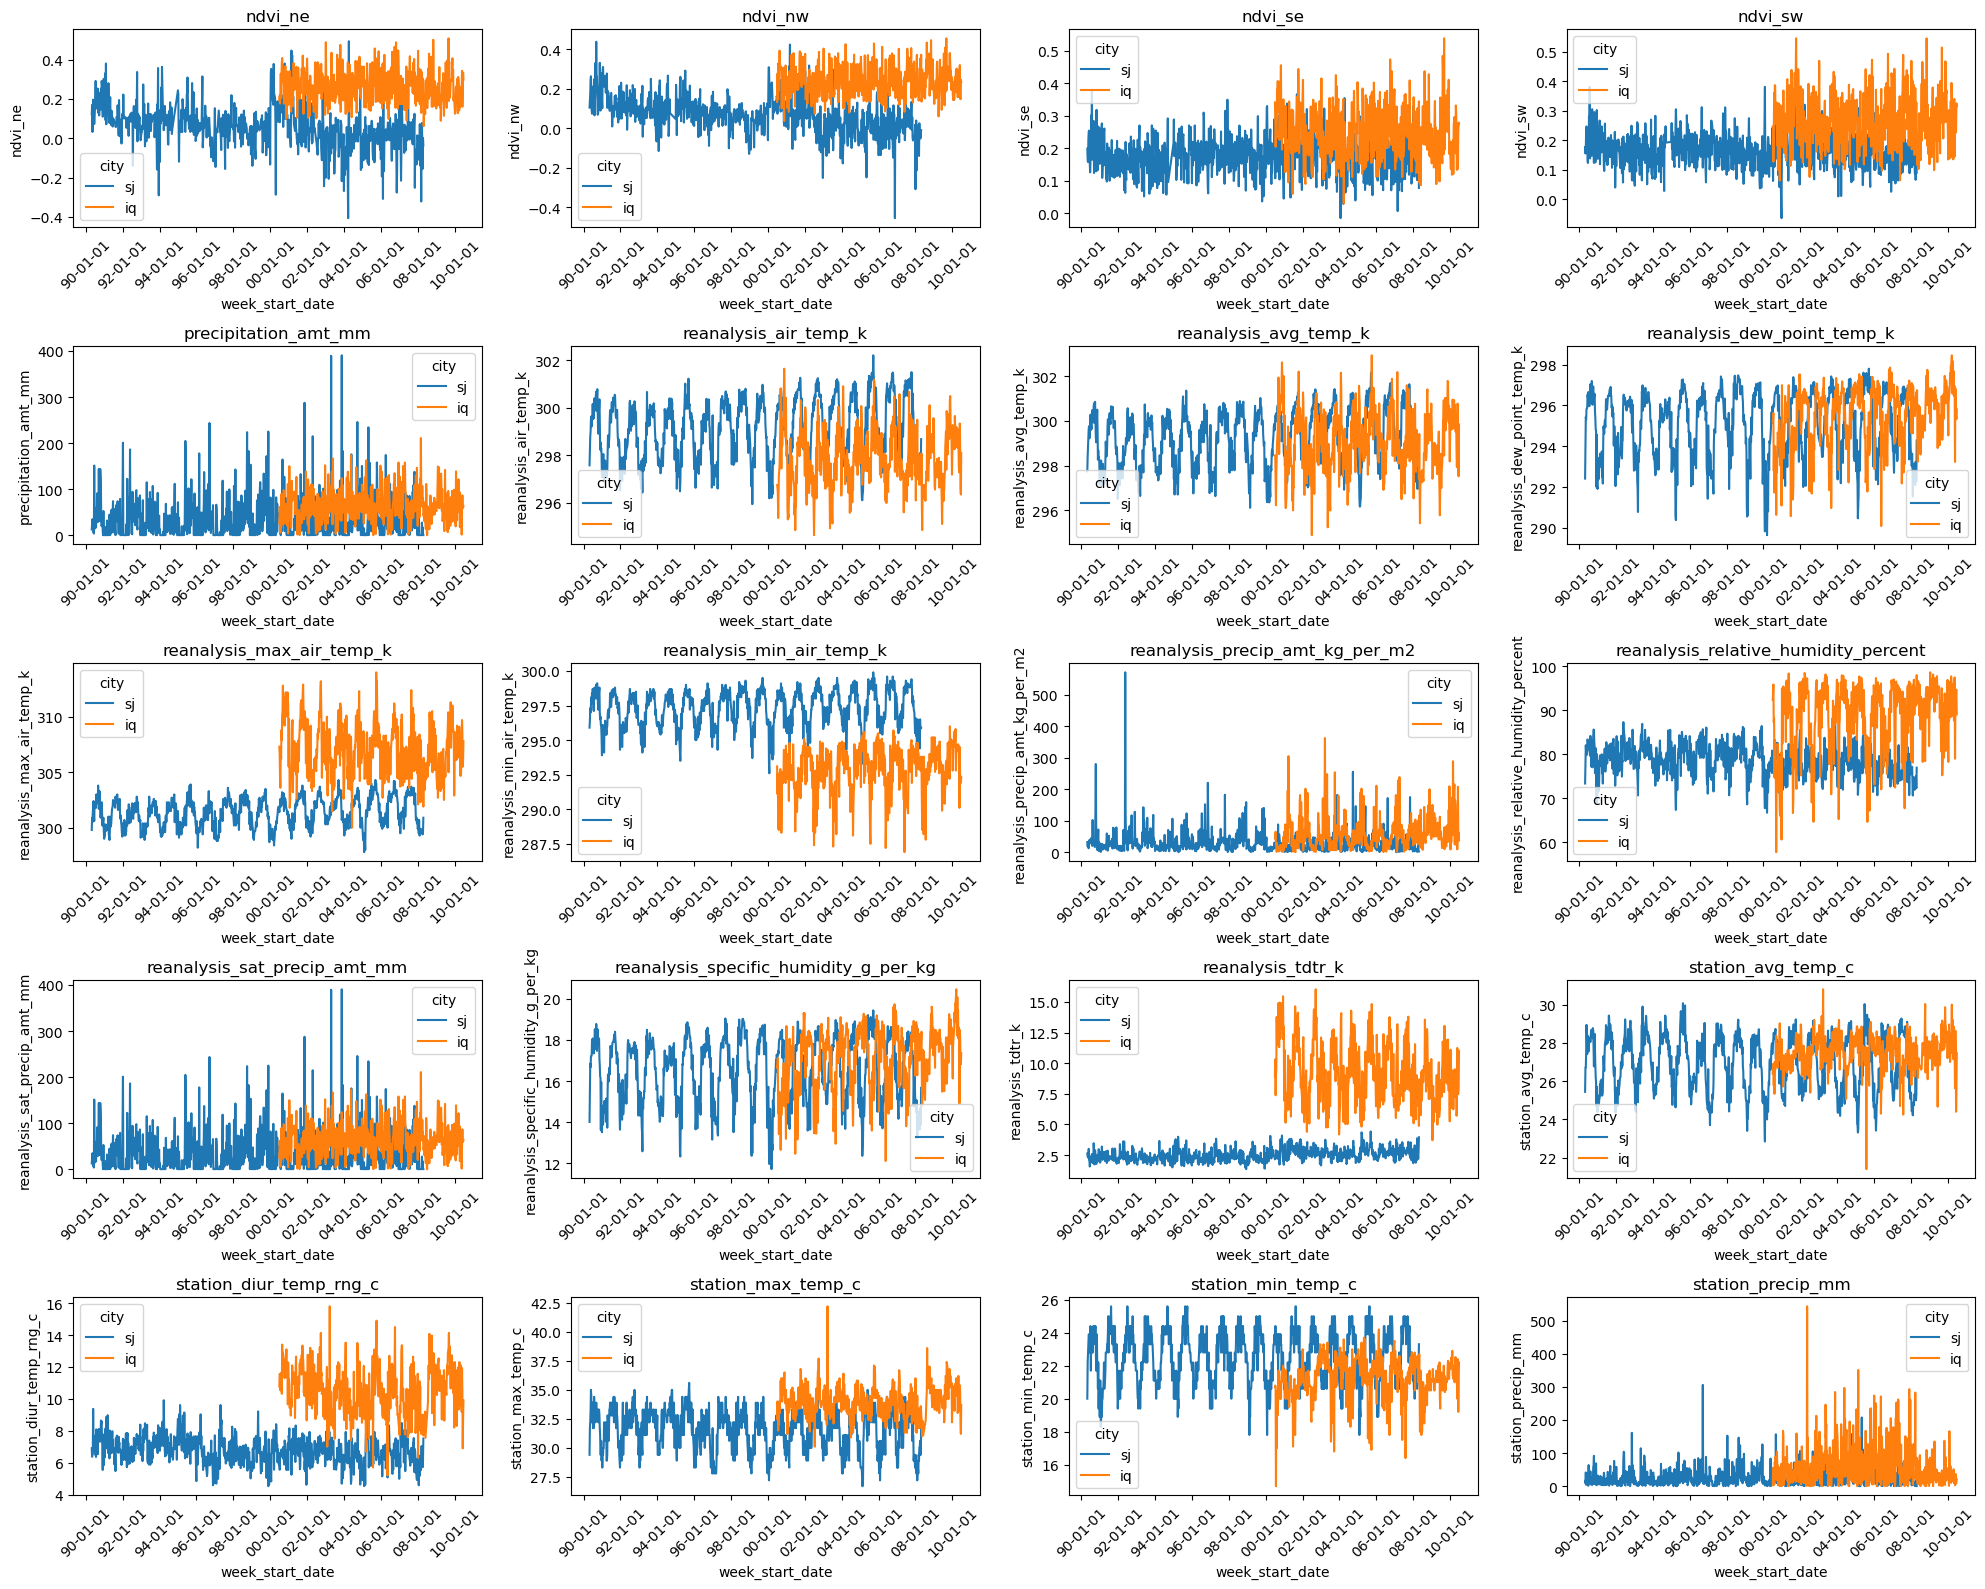

In [12]:
import matplotlib.dates as mdates

def linePlots(data, hue=None):
    fig, axs = plt.subplots(5, 4, figsize=(20, 16))
    axs = axs.ravel()

    for col, ax in zip(features, axs):
        sns.lineplot(x='week_start_date', y=col, ax=ax, data=data, hue=hue)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=15))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)  # Add this line
    plt.tight_layout()
    plt.show()

linePlots(data=X, hue='city')

## San Juan
- There appears to be some outliers


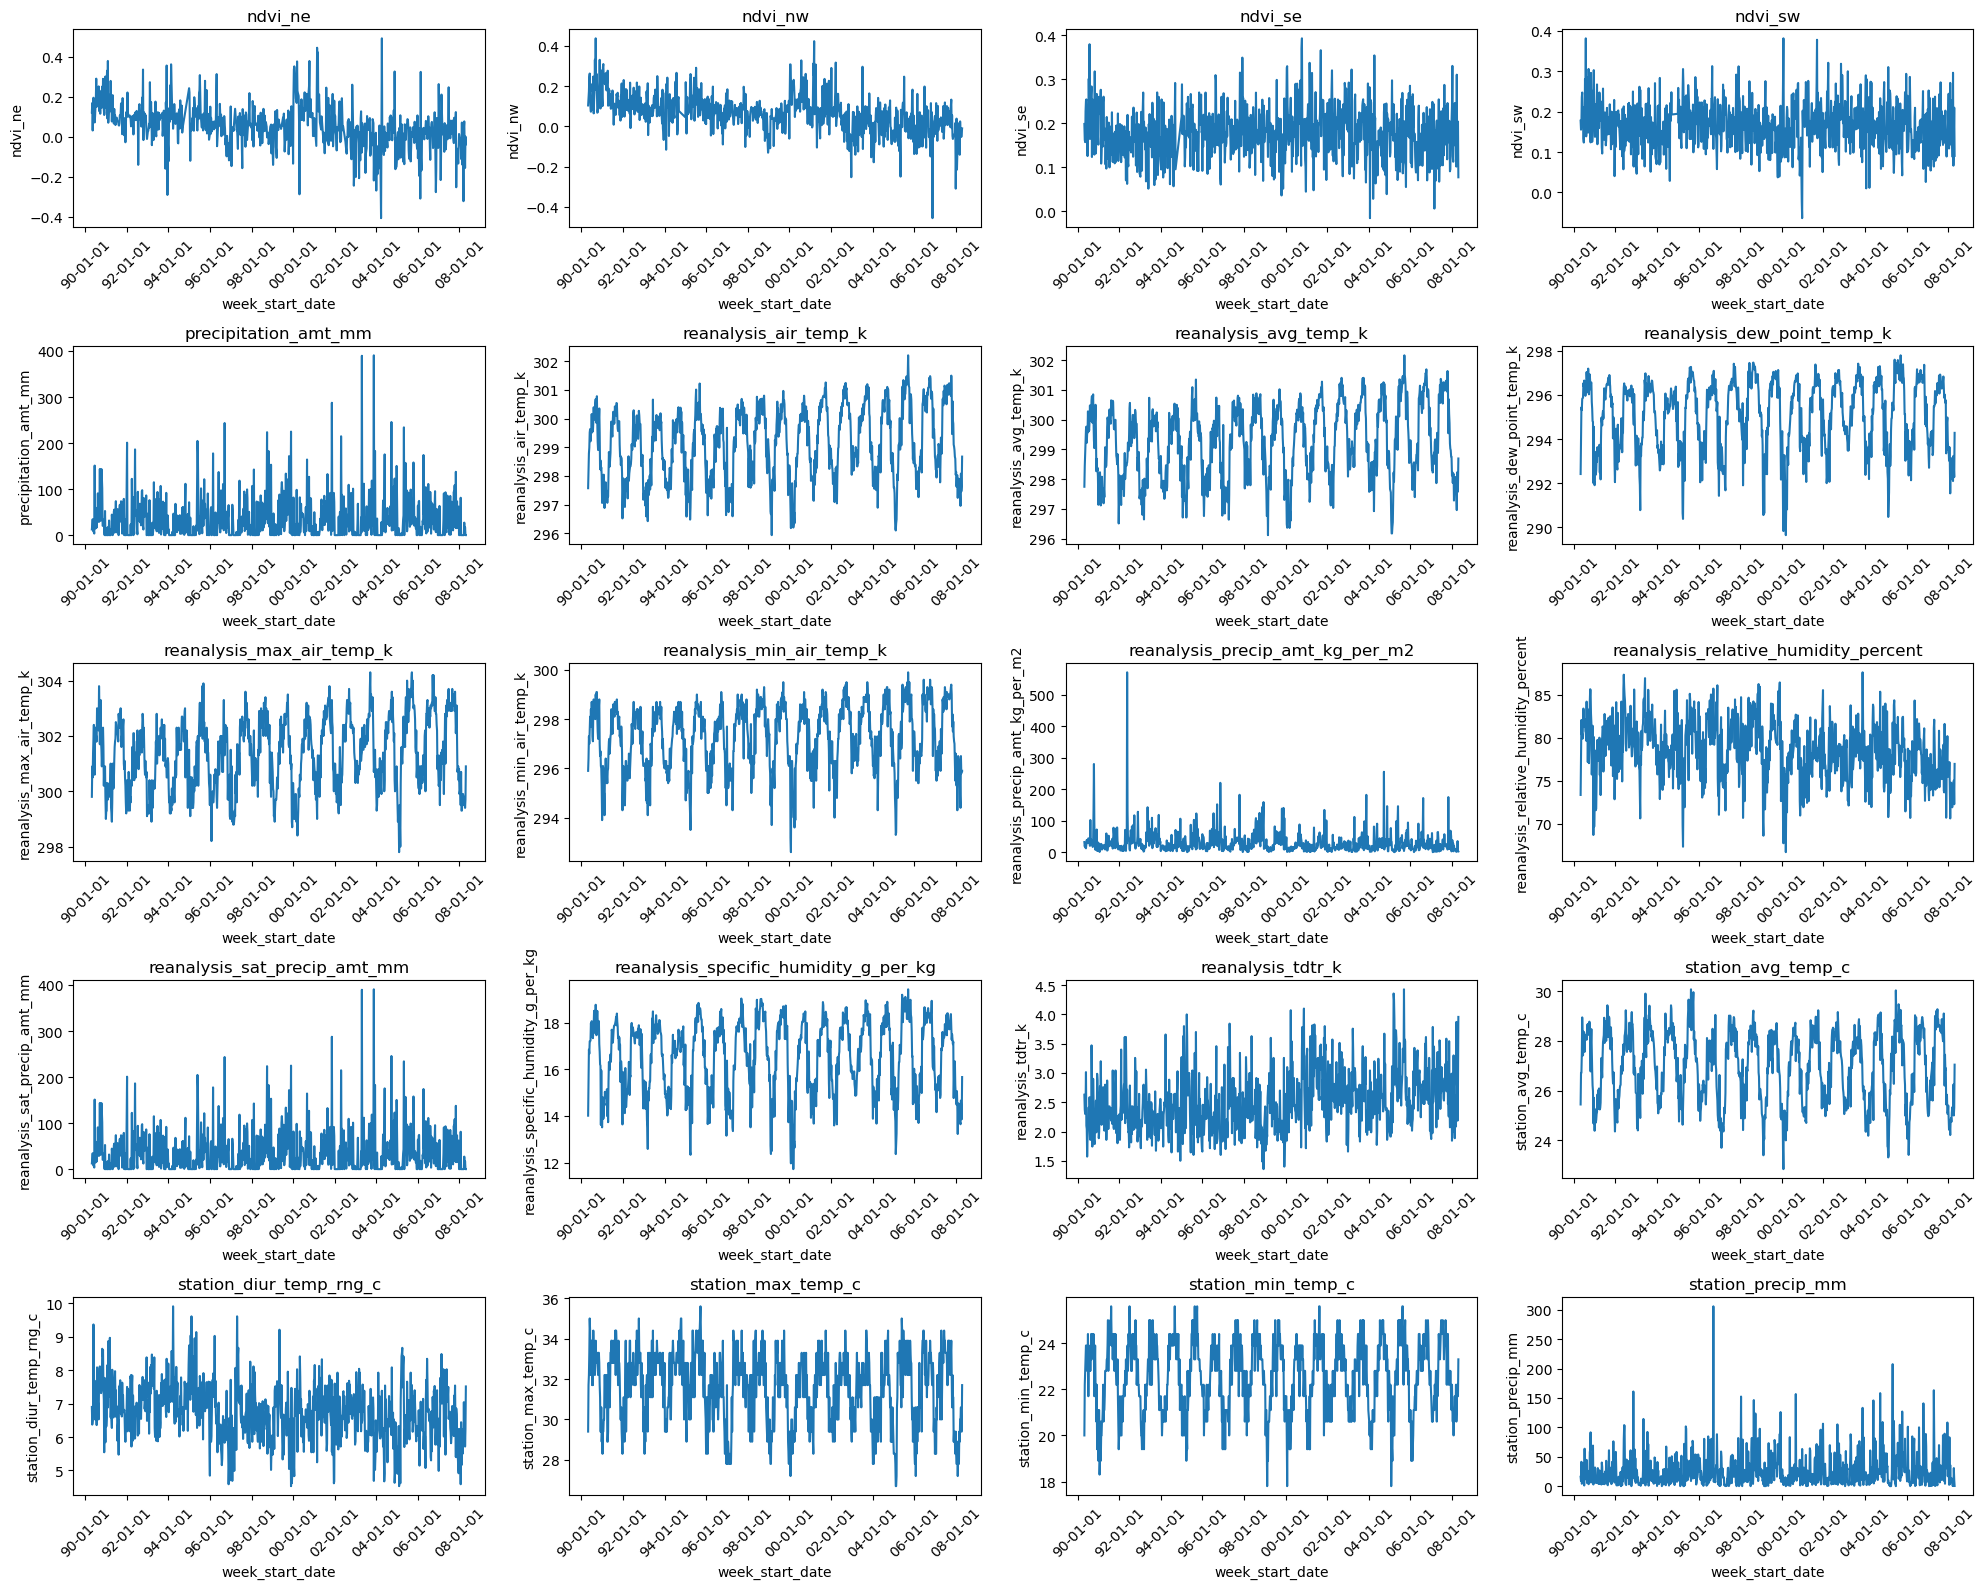

In [13]:
# Data
Xsj = X.query("city=='sj'")
linePlots(data=Xsj)

## Iquitos
- There appears to be some outliers

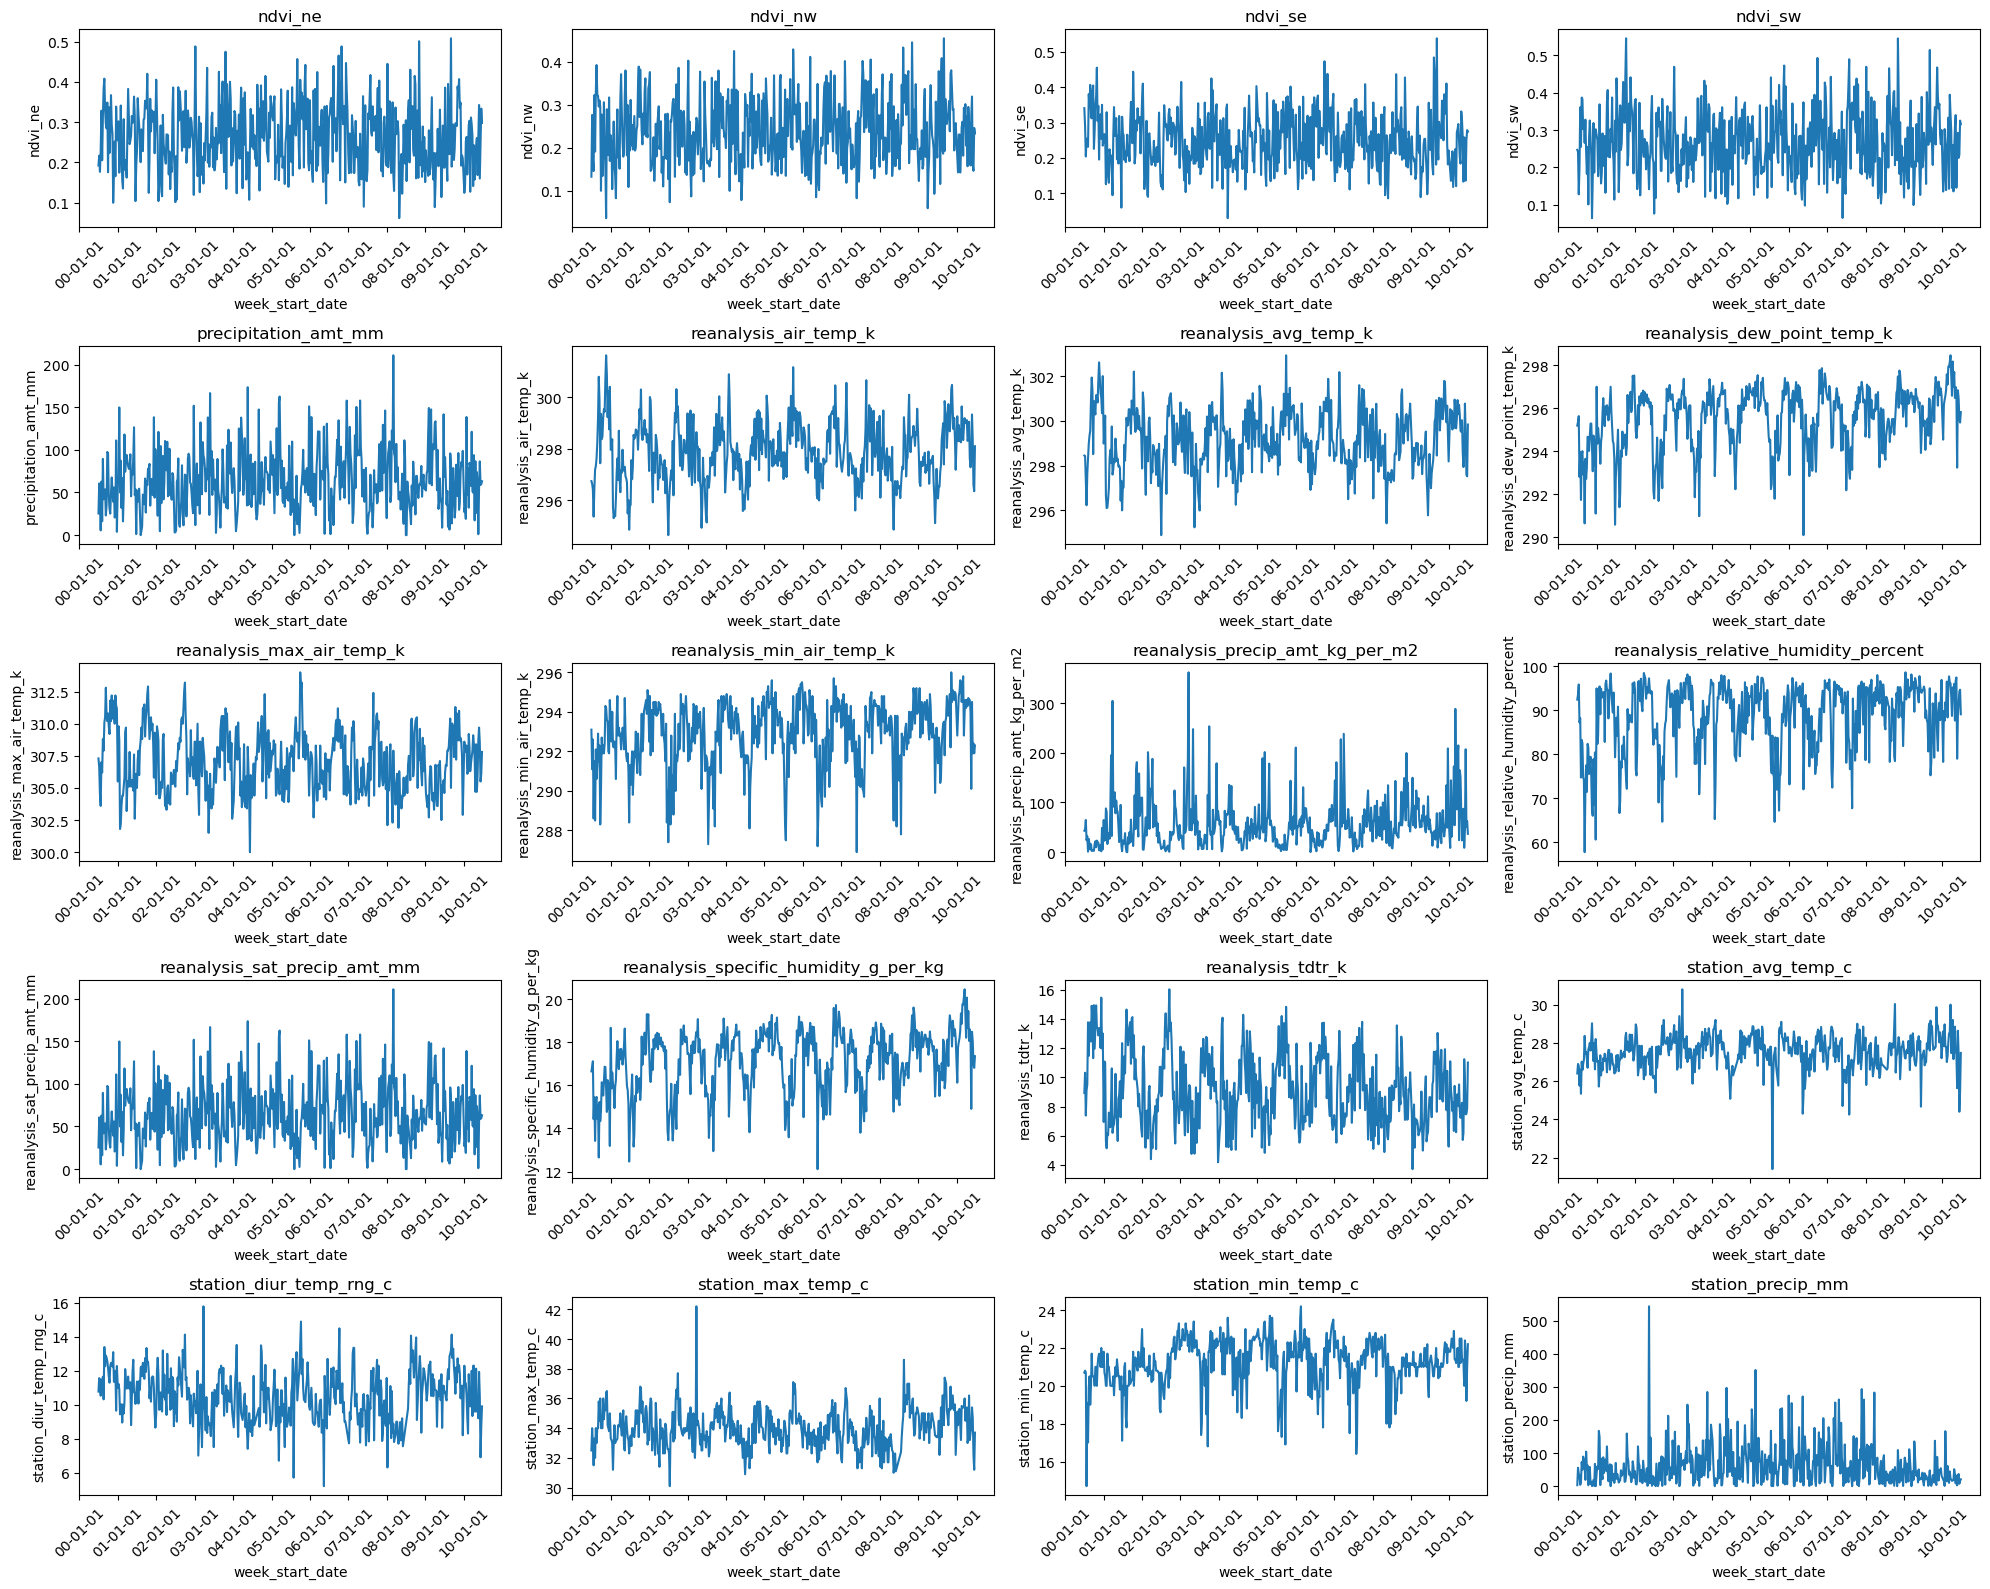

In [14]:
Xiq = X.query("city!='sj'")
linePlots(data=Xiq, hue=None)

## Dengue cases


In [15]:
y1 = pd.concat((X.loc[:,'week_start_date'],y),axis=1)
# y1['week_start_date']
y1


week_start_date city  year  weekofyear  total_cases
0         1990-04-30   sj  1990          18            4
1         1990-05-07   sj  1990          19            5
2         1990-05-14   sj  1990          20            4
3         1990-05-21   sj  1990          21            3
4         1990-05-28   sj  1990          22            6
...              ...  ...   ...         ...          ...
1451      2010-05-28   iq  2010          21            5
1452      2010-06-04   iq  2010          22            8
1453      2010-06-11   iq  2010          23            1
1454      2010-06-18   iq  2010          24            1
1455      2010-06-25   iq  2010          25            4

[1456 rows x 5 columns]

## dengue cases time 

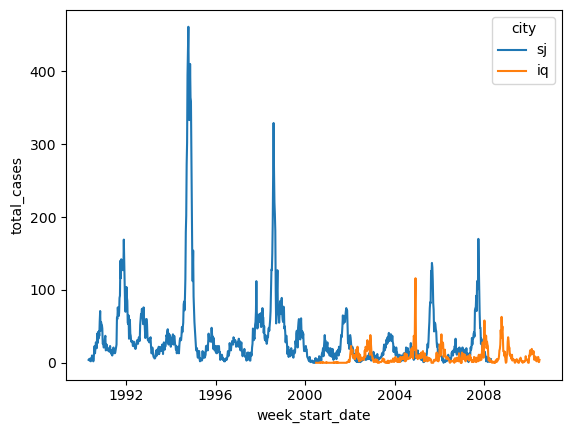

In [16]:
sns.lineplot(data=y1, x= 'week_start_date', y = 'total_cases', hue='city')
plt.show()

# MISSING VALUES IMPUTATION

In [17]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [18]:
X.iloc[:,4:]


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0     0.122600  0.103725  0.198483  0.177617                 12.42   
1     0.169900  0.142175  0.162357  0.155486                 22.82   
2     0.032250  0.172967  0.157200  0.170843                 34.54   
3     0.128633  0.245067  0.227557  0.235886                 15.36   
4     0.196200  0.262200  0.251200  0.247340                  7.52   
...        ...       ...       ...       ...                   ...   
1451  0.342750  0.318900  0.256343  0.292514                 55.30   
1452  0.160157  0.160371  0.136043  0.225657                 86.47   
1453  0.247057  0.146057  0.250357  0.233714                 58.94   
1454  0.333914  0.245771  0.278886  0.325486                 59.67   
1455  0.298186  0.232971  0.274214  0.315757                 63.22   

      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                297.572857             297.742857   
1                298.211429             298.442857   
2                298.781429             298.878571   
3                298.987143             299.228571   
4                299.518571             299.664286   
...                     ...                    ...   
1451             299.334286             300.771429   
1452             298.330000             299.392857   
1453             296.598571             297.592857   
1454             296.345714             297.521429   
1455             298.097143             299.835714   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                      292.414286                      299.8   
1                      293.951429                      300.9   
2                      295.434286                      300.5   
3                      295.310000                      301.4   
4                      295.821429                      301.9   
...                           ...                        ...   
1451                   296.825714                      309.7   
1452                   296.452857                      308.5   
1453                   295.501429                      305.5   
1454                   295.324286                      306.1   
1455                   295.807143                      307.8   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                         295.9                            32.00   
1                         296.4                            17.94   
2                         297.3                            26.10   
3                         297.0                            13.90   
4                         297.5                            12.20   
...                         ...                              ...   
1451                      294.5                            45.00   
1452                      291.9                           207.10   
1453                      292.4                            50.60   
1454                      291.9                            62.33   
1455                      292.3                            36.90   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                73.365714                         12.42   
1                                77.368571                         22.82   
2                                82.052857                         34.54   
3                                80.337143                         15.36   
4                                80.460000                          7.52   
...                                    ...                           ...   
1451                             88.765714                         55.30   
1452                             91.600000                         86.47   
1453                             94.280000                         58.94   
1454                             94.660000                         59.67   
1455                             89.082857                         63.22   

      reanalysis_s

In [19]:
y.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [20]:
df = pd.merge(X,y,on=['city', 'year', 'weekofyear'])
# df

In [21]:
scaler = StandardScaler()
all_scaled = scaler.fit_transform(X=df.iloc[:,4:])
scaler.get_feature_names_out()
df_scaled = pd.DataFrame(all_scaled, columns=scaler.get_feature_names_out())
df_scaled = pd.concat((X[datetimecols], df_scaled), axis=1)


In [22]:
df_scaled

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30 -0.140192 -0.223645 -0.071781   
1      sj  1990          19      1990-05-07  0.196522  0.096889 -0.561071   
2      sj  1990          20      1990-05-14 -0.783365  0.353580 -0.630918   
3      sj  1990          21      1990-05-21 -0.097243  0.954632  0.321991   
4      sj  1990          22      1990-05-28  0.383743  1.097461  0.642209   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  1.426986  1.570133  0.711863   
1452   iq  2010          22      2010-06-04  0.127165  0.248581 -0.917468   
1453   iq  2010          23      2010-06-11  0.745778  0.129251  0.630792   
1454   iq  2010          24      2010-06-18  1.364087  0.960506  1.017181   
1455   iq  2010          25      2010-06-25  1.109747  0.853801  0.953912   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0    -0.294358             -0.762931              -0.828956  ...   
1    -0.558220             -0.524947              -0.360090  ...   
2    -0.375120             -0.256757               0.058428  ...   
3     0.400368             -0.695655               0.209472  ...   
4     0.536934             -0.875058               0.599670  ...   
...        ...                   ...                    ...  ...   
1451  1.075535              0.218296               0.464359  ...   
1452  0.278415              0.931562              -0.273030  ...   
1453  0.374479              0.301590              -1.544318  ...   
1454  1.468644              0.318295              -1.729976  ...   
1455  1.352653              0.399530              -0.444003  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                                -1.229999                     -0.762931   
1                                -0.670270                     -0.524947   
2                                -0.015256                     -0.256757   
3                                -0.255168                     -0.695655   
4                                -0.237989                     -0.875058   
...                                    ...                           ...   
1451                              0.923418                      0.218296   
1452                              1.319743                      0.931562   
1453                              1.694494                      0.301590   
1454                              1.747630                      0.318295   
1455                              0.967765                      0.399530   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                                 -1.772788          -0.641761   
1                                 -0.890794          -0.714293   
2                                  0.066243          -0.734441   
3                                 -0.047712          -0.698175   
4                                  0.300639          -0.532962   
...                                     ...                ...   
1451                               1.127971           1.381084   
1452                               0.858370           0.724264   
1453                               0.170007           0.732323   
1454                               0.044935           0.837092   
1455                               0.395138           1.723598   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0              -1.349129                -0.544845           -1.558451   
1              -0.364967                -0.793255           -0.384164   
2              -0.364967                -0.739545           -0.128884   
3               0.221106                -0.605269            0.432731   
4               1.360080                 0.616642            1.300682   
...                  ...                      ...                 ...   
1451            1.120490                 1.820

In [23]:
features

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [24]:
# Checking rows with all missing values
df_miss = df[df.isna().any(axis=1)]
df_miss
# drop rows with all missing features
df_allmiss = df[df[features].isna().all(axis=1)]
df_allmiss 
# df.dropna(axis=0, how='all', subset=features)


city  year  weekofyear week_start_date  ndvi_ne  ndvi_nw  ndvi_se  \
139    sj  1993          53      1993-01-01      NaN      NaN      NaN   
451    sj  1999          53      1999-01-01      NaN      NaN      NaN   
763    sj  2005          53      2005-01-01      NaN      NaN      NaN   
1170   iq  2005          53      2005-01-01      NaN      NaN      NaN   
1430   iq  2010          53      2010-01-01      NaN      NaN      NaN   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
139       NaN                   NaN                    NaN  ...   
451       NaN                   NaN                    NaN  ...   
763       NaN                   NaN                    NaN  ...   
1170      NaN                   NaN                    NaN  ...   
1430      NaN                   NaN                    NaN  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
139                                    NaN                           NaN   
451                                    NaN                           NaN   
763                                    NaN                           NaN   
1170                                   NaN                           NaN   
1430                                   NaN                           NaN   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
139                                     NaN                NaN   
451                                     NaN                NaN   
763                                     NaN                NaN   
1170                                    NaN                NaN   
1430                                    NaN                NaN   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
139                  NaN                      NaN                 NaN   
451                  NaN                      NaN                 NaN   
763                  NaN                      NaN                 NaN   
1170                 NaN                      NaN                 NaN   
1430                 NaN                      NaN                 NaN   

      station_min_temp_c  station_precip_mm  total_cases  
139                  NaN                NaN           30  
451                  NaN                NaN           59  
763                  NaN                NaN           10  
1170                 NaN                NaN            9  
1430                 NaN                NaN            0  

[5 rows x 25 columns]

In [25]:
# drop rows with all missing features
df = df[~df[features].isna().all(axis=1)]

In [26]:
# checking the number of missing in each row
df[df.isnull().sum(axis=1)>10]



city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
87     sj  1992           1      1992-01-01  0.125100  0.157867  0.185283   
399    sj  1998           1      1998-01-01  0.045500  0.047800  0.123986   
711    sj  2004           1      2004-01-01 -0.268300 -0.123700  0.223757   
1118   iq  2004           1      2004-01-01  0.202571  0.198967  0.244557   
1378   iq  2009           1      2009-01-01  0.151286  0.161686  0.153271   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
87    0.181367                   NaN                    NaN  ...   
399   0.083443                   NaN                    NaN  ...   
711   0.176543                   NaN                    NaN  ...   
1118  0.187957                   NaN                    NaN  ...   
1378  0.119443                   NaN                    NaN  ...   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
87                                     NaN                           NaN   
399                                    NaN                           NaN   
711                                    NaN                           NaN   
1118                                   NaN                           NaN   
1378                                   NaN                           NaN   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
87                                      NaN                NaN   
399                                     NaN                NaN   
711                                     NaN                NaN   
1118                                    NaN                NaN   
1378                                    NaN                NaN   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
87                   NaN                      NaN                 NaN   
399                  NaN                      NaN                 NaN   
711                  NaN                      NaN                 NaN   
1118                 NaN                      NaN                 NaN   
1378                 NaN                      NaN                 NaN   

      station_min_temp_c  station_precip_mm  total_cases  
87                   NaN                NaN           81  
399                  NaN                NaN           64  
711                  NaN                NaN           15  
1118                 NaN                NaN            4  
1378                 NaN                NaN            1  

[5 rows x 25 columns]

Seems like week 1 and week 53 are the most problematic in the dataset

In [27]:
df = df[df.isnull().sum(axis=1)<10]

In [36]:
# Computing median by week
def medianByWeek(df):
    df_med = df[features+['weekofyear']].groupby('weekofyear').agg('median').reset_index()
    rename_dict = {}
    for feature in features:
        rename_dict[feature]='med_'+feature
        df_med.rename(rename_dict, inplace=True, axis=1)
    return df_med

df_med = medianByWeek(df=df)

In [37]:
## Missing values imputation
df_med

weekofyear  med_ndvi_ne  med_ndvi_nw  med_ndvi_se  med_ndvi_sw  \
0            1     0.149567     0.109400     0.190571     0.173286   
1            2     0.145286     0.124287     0.219050     0.194671   
2            3     0.174300     0.108383     0.207064     0.208250   
3            4     0.113331     0.128925     0.185343     0.195307   
4            5     0.158229     0.141373     0.201043     0.180793   
5            6     0.101600     0.084600     0.196171     0.196371   
6            7     0.155414     0.136850     0.201186     0.195179   
7            8     0.129050     0.120333     0.170936     0.182793   
8            9     0.162350     0.139200     0.169696     0.160905   
9           10     0.162686     0.138667     0.205221     0.211343   
10          11     0.129243     0.115067     0.181564     0.171521   
11          12     0.137950     0.168800     0.185271     0.206079   
12          13     0.162380     0.159750     0.193433     0.196343   
13          14     0.136000     0.073850     0.186645     0.185142   
14          15     0.137496     0.137225     0.184274     0.156400   
15          16     0.086900     0.102400     0.189857     0.195605   
16          17     0.128100     0.113700     0.183500     0.182129   
17          18     0.130200     0.108212     0.194456     0.177337   
18          19     0.143450     0.121543     0.160300     0.140079   
19          20     0.113800     0.096888     0.177242     0.176729   
20          21     0.117800     0.112075     0.184114     0.186836   
21          22     0.099111     0.101067     0.188093     0.163065   
22          23     0.110650     0.092443     0.174971     0.160129   
23          24     0.116300     0.092800     0.170193     0.195443   
24          25     0.104450     0.100296     0.189386     0.183836   
25          26     0.141829     0.133179     0.184443     0.170400   
26          27     0.110471     0.135250     0.199664     0.197457   
27          28     0.146725     0.162971     0.190157     0.177436   
28          29     0.117200     0.113958     0.194543     0.188821   
29          30     0.104500     0.163071     0.207214     0.204229   
30          31     0.134775     0.127000     0.190586     0.196779   
31          32     0.148413     0.117208     0.211957     0.195829   
32          33     0.096900     0.126650     0.203886     0.204550   
33          34     0.135500     0.133813     0.204036     0.197393   
34          35     0.099600     0.145250     0.217529     0.206636   
35          36     0.112100     0.115967     0.209293     0.215742   
36          37     0.121938     0.151280     0.218207     0.191848   
37          38     0.151600     0.115546     0.181017     0.209950   
38          39     0.122580     0.122075     0.199443     0.212271   
39          40     0.206300     0.164835     0.217486     0.195871   
40          41     0.134463     0.104000     0.207183     0.191100   
41          42     0.212200     0.128860     0.218757     0.210733   
42          43     0.146200     0.132600     0.196967     0.199871   
43          44     0.148129     0.131471     0.198271     0.178957   
44          45     0.133700     0.124883     0.221229     0.191114   
45          46     0.099933     0.111400     0.196171     0.185300   
46          47     0.210464     0.181800     0.215914     0.191386   
47          48     0.159620     0.156250     0.195900     0.198700   
48          49     0.112600     0.088350     0.254567     0.230843   
49          50     0.061900     0.097475     0.204714     0.196314   
50          51     0.178386     0.066425     0.192343     0.184129   
51          52     0.121475     0.099812     0.199787     0.179676   

    med_precipitation_amt_mm  med_reanalysis_air_temp_k  \
0                     16.270                 298.162857   
1                     24.420                 297.978571   
2                     37.030                 297.776429   
3                      3.325                 297.671429  

In [38]:
df1 = df.merge(df_med, how='left',on='weekofyear')

df1.where(df1)


## Median of features by week

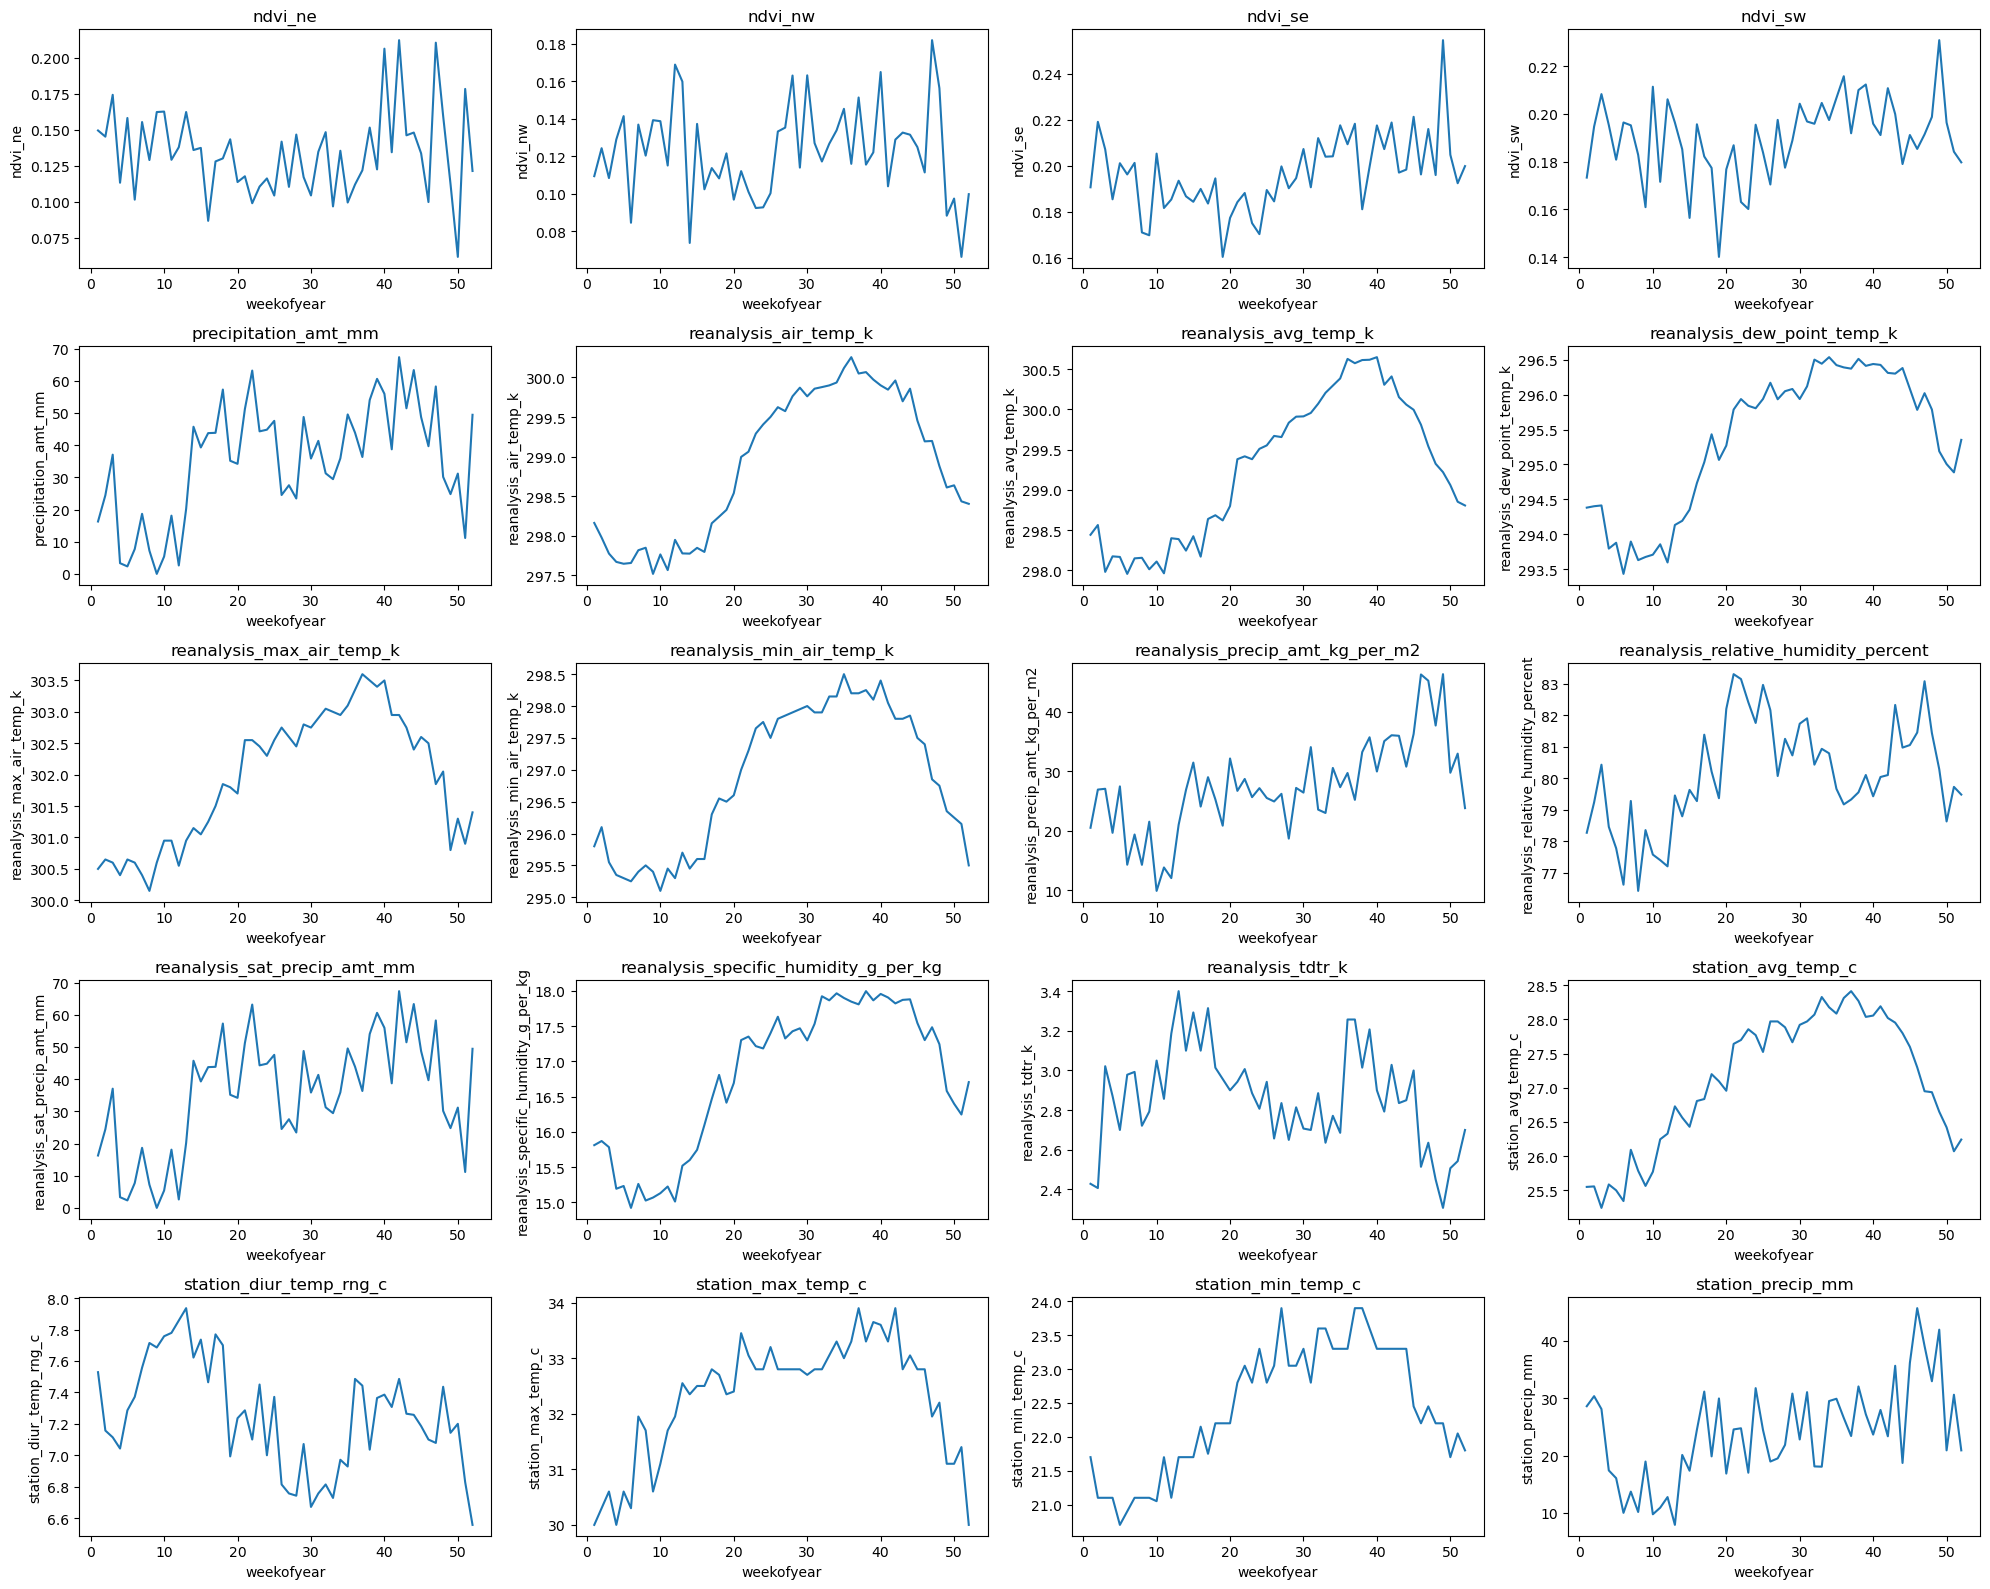

In [ ]:
features = df_med.columns[1:]

fig, axs = plt.subplots(5,4, figsize = (20,16))
axs = axs.ravel()

for f, ax in zip(features,axs):
    sns.lineplot(data=df_med, x = 'weekofyear', y=f, ax=ax)
    ax.set_title(f)
plt.tight_layout()


## imputation of Missing Values

In [ ]:
features[5]

'reanalysis_air_temp_k'

## Plotting .. 

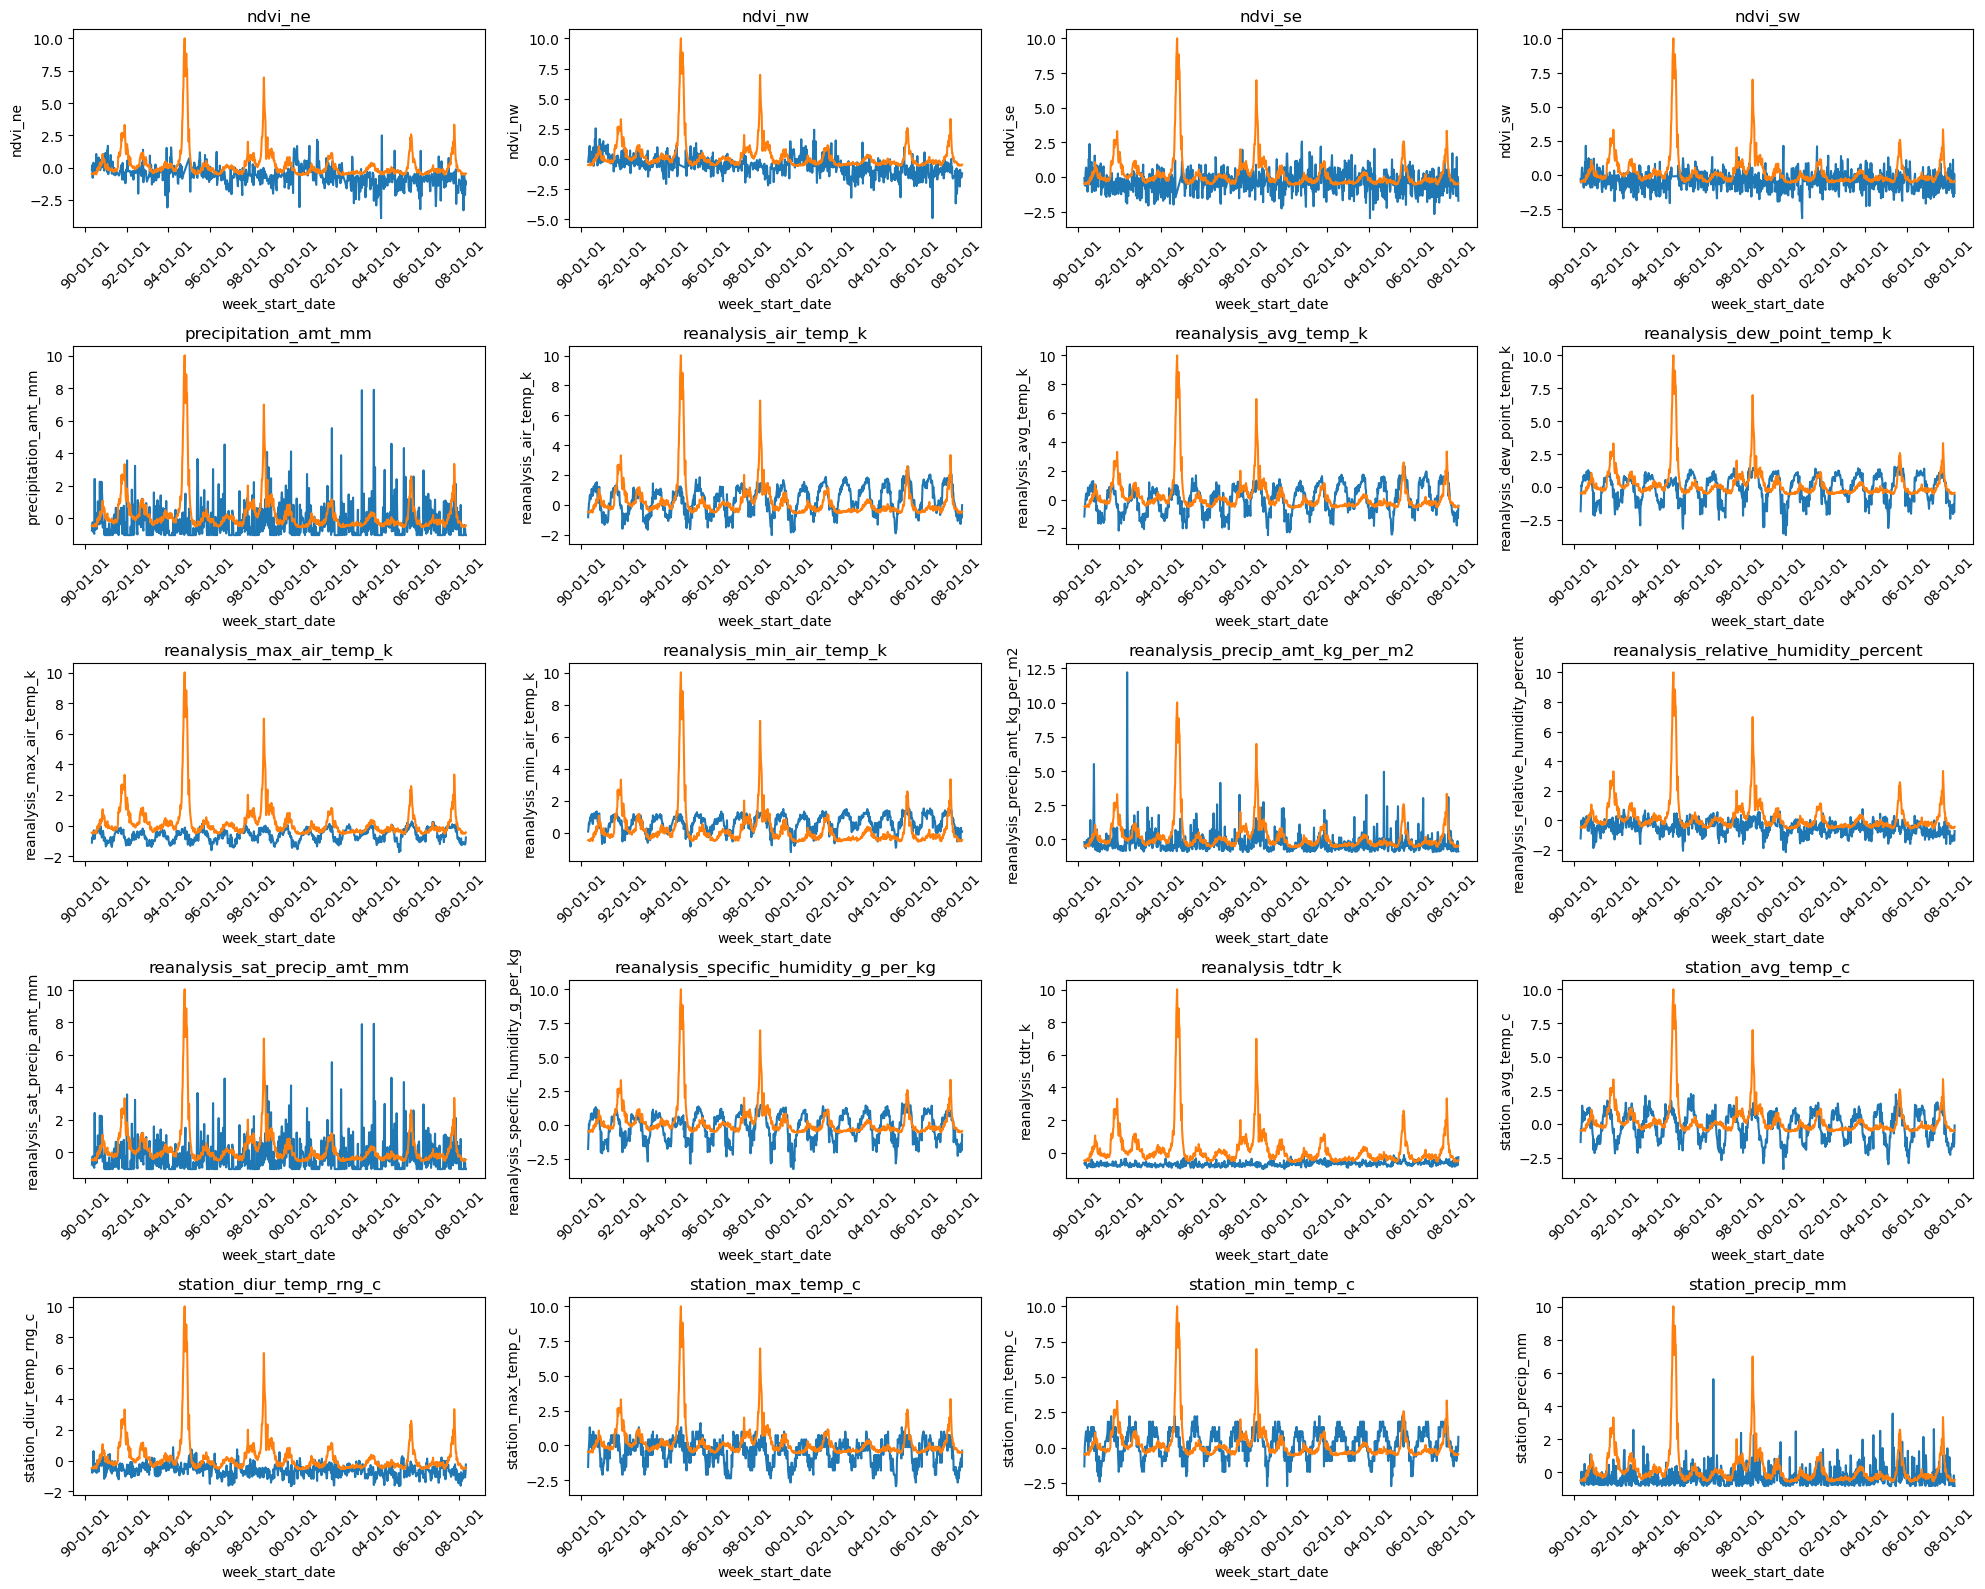

In [ ]:
def linePlots2(data, features,hue=None):
    fig, axs = plt.subplots(5, 4, figsize=(20, 16))
    axs = axs.ravel()

    for col, ax in zip(features, axs):
        sns.lineplot(x='week_start_date', y=col, ax=ax, data=data, hue=hue)
        sns.lineplot(x='week_start_date', y='total_cases', ax=ax, data=data, hue=hue)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=15))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)  # Add this line
    plt.tight_layout()
    plt.show()

linePlots2(data=df_scaled[df_scaled['city']=='sj'], features=features)

In [ ]:
df_scaled['total_cases'].max()

10.011807850850895

In [ ]:
df_scaled['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)